**Import of required modules and libraries**

# New Section

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
print("Required libraries and modules imported successfully!")

import warnings
warnings.filterwarnings("ignore")
print("Warnings will be ignored")

Required libraries and modules imported successfully!
Warnings will be ignored


**Read dataset**

In [ ]:
df_train=pd.read_csv('/content/train.csv')
print("Training set imported Successfully!")

Training set imported Successfully!


In [ ]:
df_test=pd.read_csv('/content/test.csv')
print("Testing set imported Successfully!")


Testing set imported Successfully!


**Dimension**

In [ ]:
print("Number of rows in the training set is : ", df_train.shape[0])
print("Number of columns in the training set is : ", df_train.shape[1])

Number of rows in the training set is :  891
Number of columns in the training set is :  12


In [ ]:
print("Number of rows in the training set is : ", df_test.shape[0])
print("Number of columns in the training set is : ", df_test.shape[1])

Number of rows in the training set is :  418
Number of columns in the training set is :  11


**Columns**

**The output in the previous section showed that, there are 12 columns in training set and 11 columns in testing set.**



**Training Set**

In [ ]:
a=df_train.columns
pd.DataFrame(a)

,0
0,PassengerId
1,Survived
2,Pclass
3,Name
4,Sex
5,Age
6,SibSp
7,Parch
8,Ticket
9,Fare


**Testing set**

In [ ]:
b=df_test.columns
pd.DataFrame(b)

,0
0,PassengerId
1,Pclass
2,Name
3,Sex
4,Age
5,SibSp
6,Parch
7,Ticket
8,Fare
9,Cabin


**Data Type of Columns**

**Training Set**

In [ ]:
df_train.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [ ]:
intList = list ()         # Initialize an empty list to store the columns with int type data
floatList = list ()       # Initialize an empty list to store the columns with float type data
objectList = list ()      # Initialize an empty list to store the columns with object type data

for i in df_train.columns :
    if df_train.dtypes[i] == int :
        intList.append(i)        
    elif df_train.dtypes[i] == float :
        floatList.append(i)
    else :
        objectList.append(i)

print("========== Columns with Integer values ==========")
icount = 0
for i in intList :
    icount += 1
    print(icount, "\t", i)

print("\n")

print("=========== Columns with Float values ===========")
fcount = 0
for i in floatList :
    fcount += 1
    print(fcount, "\t", i)

print("\n")

print("=========== Columns with Object values ===========")
ocount = 0
for i in objectList :
    ocount += 1
    print(ocount, "\t", i)

========== Columns with Integer values ==========
1 	 PassengerId
2 	 Survived
3 	 Pclass
4 	 SibSp
5 	 Parch


=========== Columns with Float values ===========
1 	 Age
2 	 Fare


=========== Columns with Object values ===========
1 	 Name
2 	 Sex
3 	 Ticket
4 	 Cabin
5 	 Embarked


**Testing Set**

In [ ]:
df_test.dtypes.value_counts()

object     5
int64      4
float64    2
dtype: int64

In [ ]:
intList = list ()         # Initialize an empty list to store the columns with int type data
floatList = list ()       # Initialize an empty list to store the columns with float type data
objectList = list ()      # Initialize an empty list to store the columns with object type data

for i in df_test.columns :
    if df_test.dtypes[i] == int :
        intList.append(i)        
    elif df_test.dtypes[i] == float :
        floatList.append(i)
    else :
        objectList.append(i)

print("========== Columns with Integer values ==========")
icount = 0
for i in intList :
    icount += 1
    print(icount, "\t", i)

print("\n")

print("=========== Columns with Float values ===========")
fcount = 0
for i in floatList :
    fcount += 1
    print(fcount, "\t", i)
print("\n")

print("=========== Columns with Object values ===========")
ocount = 0
for i in objectList :
    ocount += 1
    print(ocount, "\t", i)

========== Columns with Integer values ==========
1 	 PassengerId
2 	 Pclass
3 	 SibSp
4 	 Parch


=========== Columns with Float values ===========
1 	 Age
2 	 Fare


=========== Columns with Object values ===========
1 	 Name
2 	 Sex
3 	 Ticket
4 	 Cabin
5 	 Embarked


**Data Cleaning and Feature Engineering**

**Training Set**

In [ ]:
df_train["Name"].sample(5)

844                 Culumovic, Mr. Jeso
56                    Rugg, Miss. Emily
406    Widegren, Mr. Carl/Charles Peter
380               Bidois, Miss. Rosalie
6               McCarthy, Mr. Timothy J
Name: Name, dtype: object

The names here are joined together in the format :

[Last Name], [Title][First Name]

So, here we will split the Name column in three seperate columns which will be :

1.Title

2.First Name

3.Last Name

The columns will be in order as written above.

In [ ]:
last_titleFirst = df_train["Name"].str.split(",", expand = True)
last_titleFirst

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina
3,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,Allen,Mr. William Henry
...,...,...
886,Montvila,Rev. Juozas
887,Graham,Miss. Margaret Edith
888,Johnston,"Miss. Catherine Helen ""Carrie"""
889,Behr,Mr. Karl Howell


The above output shows that, the first column contains the last names, while the second column contains the first name along the titles.

So, we will insert the second column after "PassengerId", i.e, at index 1 and then the last names will be inserted.

In [ ]:
# Column with first names with the titles
df_train.insert(
    loc = 1,
    column = "Title_First",
    value = last_titleFirst[1]
)

# Column with last names
df_train.insert(
    loc = 2,
    column = "LastName",
    value  = last_titleFirst[0]
)

Now, we will split the "Title_First" column to "Title" and "FirstName".

In [ ]:
title_first = df_train["Title_First"].str.split(n = 1, expand = True)
title_first

,0,1
0,Mr.,Owen Harris
1,Mrs.,John Bradley (Florence Briggs Thayer)
2,Miss.,Laina
3,Mrs.,Jacques Heath (Lily May Peel)
4,Mr.,William Henry
...,...,...
886,Rev.,Juozas
887,Miss.,Margaret Edith
888,Miss.,"Catherine Helen ""Carrie"""
889,Mr.,Karl Howell


The above output shows that, the first column contains the titles, while the second column contains the first names.

So, we will insert the first column after "PassengerId", i.e, at index 1 and then the first names will be inserted.

In [ ]:
# Column with titles
df_train.insert(
    loc = 1,
    column = "Title",
    value = title_first[0]
)

# Column with first names
df_train.insert(
    loc = 2,
    column = "FirstName",
    value = title_first[1]
)

We will now remove "." at end of each Title.

In [ ]:
df_train["Title"] = df_train["Title"].str.rstrip(".")

Now, the "Title_First" and "Name" columns can be removed.

In [ ]:
df_train = df_train.drop(columns = ["Title_First","Name"])

Sample of 10 rows are checked, if the columns "Title", "FirstName" and "LastName" are added or not.

In [ ]:
df_train.sample(10)

,PassengerId,Title,FirstName,LastName,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
635,636,Miss,Mary,Davis,1,2,female,28.0,0,0,237668,13.0000,NaN,S
504,505,Miss,Roberta,Maioni,1,1,female,16.0,0,0,110152,86.5000,B79,S
435,436,Miss,Lucile Polk,Carter,1,1,female,14.0,1,2,113760,120.0000,B96 B98,S
380,381,Miss,Rosalie,Bidois,1,1,female,42.0,0,0,PC 17757,227.5250,NaN,C
552,553,Mr,Timothy,O'Brien,0,3,male,NaN,0,0,330979,7.8292,NaN,Q
804,805,Mr,Oskar Arvid,Hedman,1,3,male,27.0,0,0,347089,6.9750,NaN,S
58,59,Miss,Constance Mirium,West,1,2,female,5.0,1,2,C.A. 34651,27.7500,NaN,S
333,334,Mr,Leo Edmondus,Vander Planke,0,3,male,16.0,2,0,345764,18.0000,NaN,S
172,173,Miss,Eleanor Ileen,Johnson,1,3,female,1.0,1,1,347742,11.1333,NaN,S
110,111,Mr,Walter Chamberlain,Porter,0,1,male,47.0,0,0,110465,52.0000,C110,S


**Testing Set**

In [ ]:
# Divide the Name column
last_titleFirst = df_test["Name"].str.split(",", expand = True)
# Insert column with first names with the titles
df_test.insert(
    loc = 1,
    column = "Title_First",
    value = last_titleFirst[1]
)
# Insert column with last names
df_test.insert(
    loc = 2,
    column = "LastName",
    value  = last_titleFirst[0]
)

# Divide the Title_First column
title_first = df_test["Title_First"].str.split(n = 1, expand = True)
# Insert column with titles
df_test.insert(
    loc = 1,
    column = "Title",
    value = title_first[0]
)

# Insert column with first names
df_test.insert(
    loc = 2,
    column = "FirstName",
    value = title_first[1]
)

# Remove "." at end of each Title
df_test["Title"] = df_test["Title"].str.rstrip(".")
# Remove the Title_First and Name columns
df_test = df_test.drop(columns = ["Title_First","Name"])

# Sample of 10 rows
df_test.sample(10)

,PassengerId,Title,FirstName,LastName,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
387,1279,Mr,John,Ashby,2,male,57.0,0,0,244346,13.0000,NaN,S
267,1159,Mr,Charles William,Warren,3,male,NaN,0,0,C.A. 49867,7.5500,NaN,S
366,1258,Mr,Joseph,Caram,3,male,NaN,1,0,2689,14.4583,NaN,C
289,1181,Mr,Arthur,Ford,3,male,NaN,0,0,A/5 1478,8.0500,NaN,S
405,1297,Mr,"Alfred (Baron von Drachstedt"")""",Nourney,2,male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
120,1012,Miss,Bertha J,Watt,2,female,12.0,0,0,C.A. 33595,15.7500,NaN,S
218,1110,Mrs,George Dunton (Eleanor Elkins),Widener,1,female,50.0,1,1,113503,211.5000,C80,C
160,1052,Miss,Julia,Smyth,3,female,NaN,0,0,335432,7.7333,NaN,Q
255,1147,Mr,George William,MacKay,3,male,NaN,0,0,C.A. 42795,7.5500,NaN,S
223,1115,Mr,Einar Gervasius,Karlsson,3,male,21.0,0,0,350053,7.7958,NaN,S


**Missing Value**

As it is clear from the Dimension section, that training set contains 891 rows. So, a column in the training set will contain 891 values, if there are no missing values in that column and this is true for all the columns present in the training set.

Simillarly, it is clear from the Dimension section, that testing set contains 418 rows. So, a column in the testing set will contain 418 values, if there are no missing values in that column and this is true for all the columns present in the testing set.

In this section, the columns with missing values will be identified and will be pre-processed accordingly.

**Missing Value Identification**
Training Set

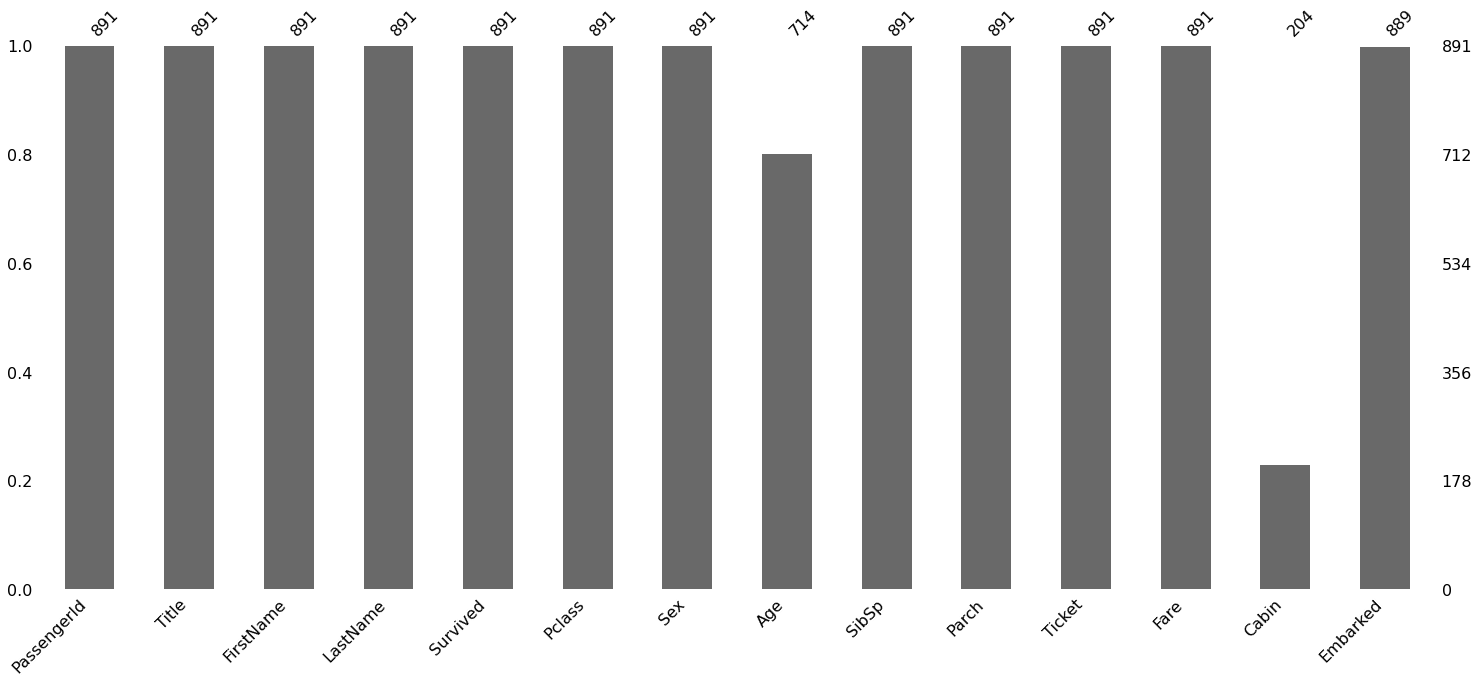

In [ ]:
msno.bar(df_train)

Number of values present



*   Age : 714
*   Cabin : 204
*   Embarked : 889
*   Others : 891













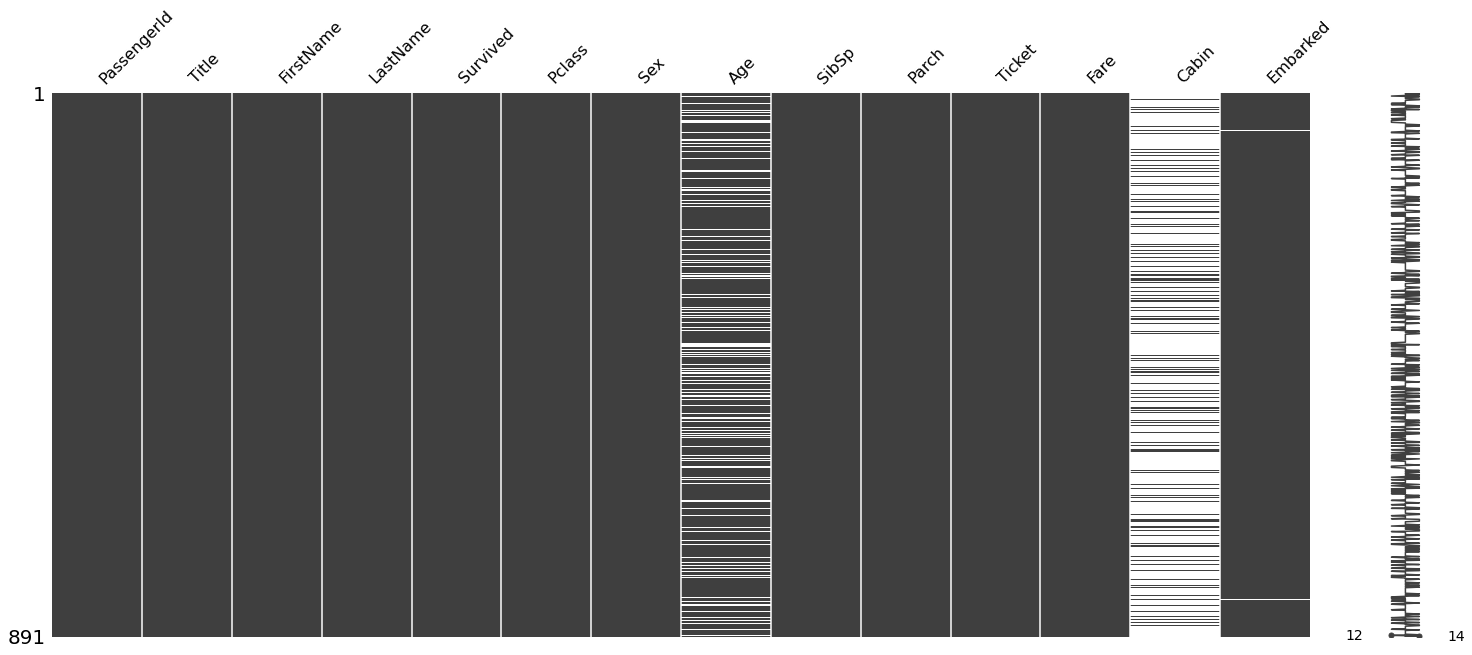

In [ ]:
msno.matrix(df_train)

In [ ]:
missingCount = list()

for i in df_train.columns :
    missingCount.append(891-df_train[i].count())

pd.DataFrame(
    (df_train.columns, missingCount),
    columns = range(1,len(df_train.columns)+1,1),
    index = ["Column Names", "Number of Missing Values"]
)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Column Names,PassengerId,Title,FirstName,LastName,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Number of Missing Values,0,0,0,0,0,0,0,177,0,0,0,0,687,2


The percentage of missing values present in Age, Cabin and Embarked, is shown in the following output.

In [ ]:
print("Percentage of missing values in 'Age' is : ", "%.2f" % ((df_train["Age"].isnull().sum()/891) * 100), "%")
print("Percentage of missing values in 'Cabin' is : ", "%.2f" % ((df_train["Cabin"].isnull().sum()/891) * 100), "%")
print("Percentage of missing values in 'Embarked' is : ", "%.2f" % ((df_train["Embarked"].isnull().sum()/891) * 100), "%")

Percentage of missing values in 'Age' is :  19.87 %
Percentage of missing values in 'Cabin' is :  77.10 %
Percentage of missing values in 'Embarked' is :  0.22 %


**Testing Set**

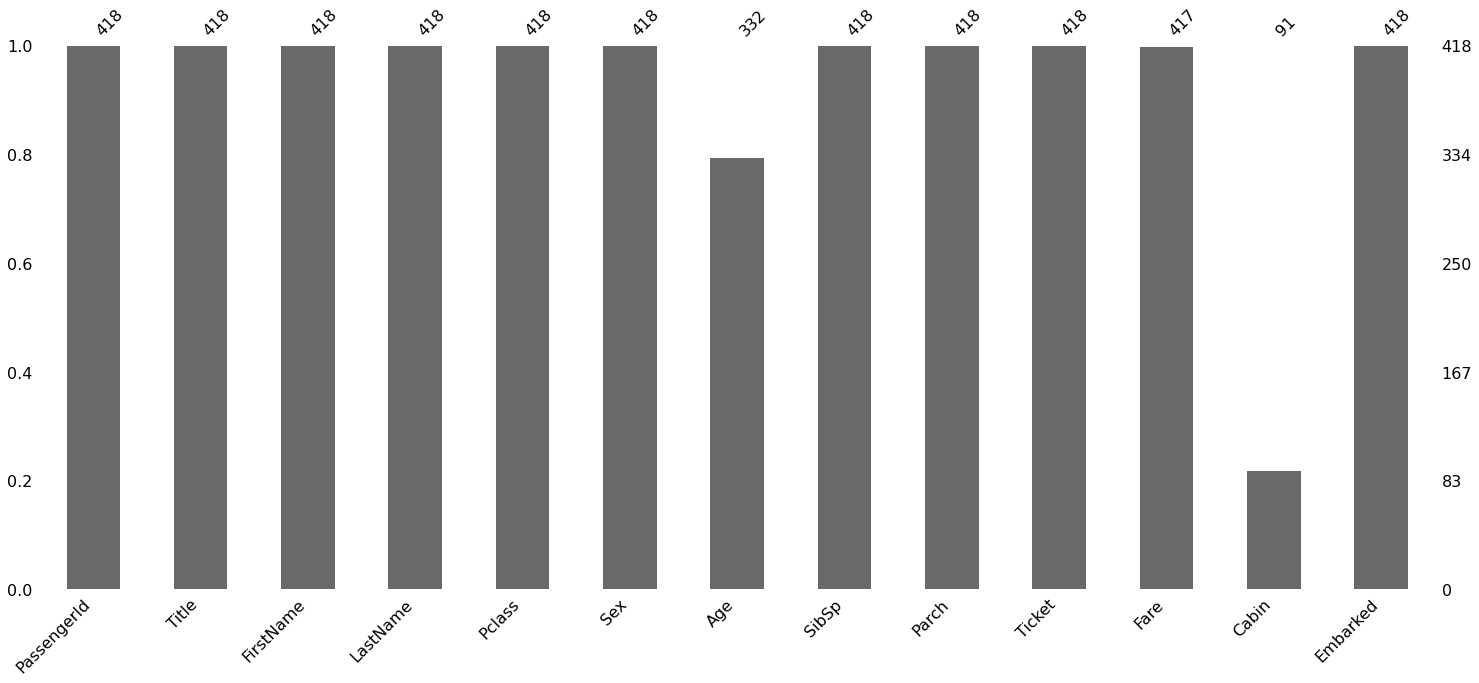

In [ ]:
msno.bar(df_test)

Number of values present in

*  Age : 332
*  Cabin : 91
*  Fare : 417
*  Others : 418

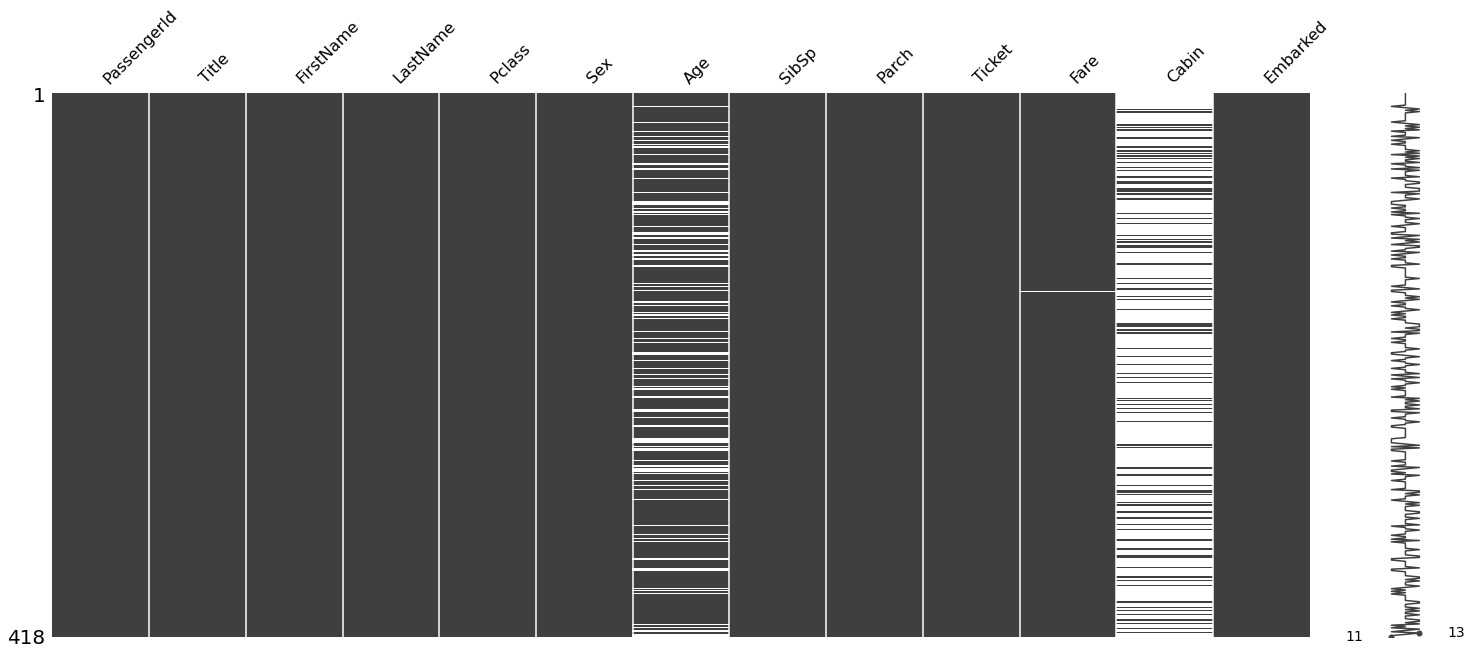

In [ ]:
msno.matrix(df_test)

In [ ]:
missingCount = list()

for i in df_test.columns :
    missingCount.append(418-df_test[i].count())

pd.DataFrame(
    (df_test.columns, missingCount),
    columns = range(1,len(df_test.columns)+1,1),
    index = ["Column Names", "Number of Missing Values"]
)

,1,2,3,4,5,6,7,8,9,10,11,12,13
Column Names,PassengerId,Title,FirstName,LastName,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Number of Missing Values,0,0,0,0,0,0,86,0,0,0,1,327,0


The percentage of missing values present in Age, Cabin and Fare, is shown in the following output.

In [ ]:
print("Percentage of missing values in 'Age' is : ", "%.2f" % ((df_test["Age"].isnull().sum()/891) * 100), "%")
print("Percentage of missing values in 'Cabin' is : ", "%.2f" % ((df_test["Cabin"].isnull().sum()/891) * 100), "%")
print("Percentage of missing values in 'Fare' is : ", "%.2f" % ((df_test["Fare"].isnull().sum()/891) * 100), "%")

Percentage of missing values in 'Age' is :  9.65 %
Percentage of missing values in 'Cabin' is :  36.70 %
Percentage of missing values in 'Fare' is :  0.11 %


Missing Value Treatment on **Embarked** in Training Set

Here, we will find out the details of the two passengers for whom the value of the Embarked are missing. If they have other family member(s) aboard, then we can assume that they boarded the Titanic from the same port with their family member(s). Then the port of the family member(s) can be imputed in case of the two passengers with the missing "Embarked".

In [ ]:
df_train[ df_train["Embarked"].isnull() ]

,PassengerId,Title,FirstName,LastName,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,Miss,Amelie,Icard,1,1,female,38.0,0,0,113572,80.0,B28,NaN
829,830,Mrs,George Nelson (Martha Evelyn),Stone,1,1,female,62.0,0,0,113572,80.0,B28,NaN


So, the two passengers, whose Embarked value is missingare :

* Miss. Amelie Icard (PassengerId : 62)
* Mrs. George Nelson (Martha Evelyn) Stone (PassengerId : 829)
But as both of the passengers were travelling alone, the Embarked values cannot be guessed as planned above.

So, the missing values will be imputed with that port, which has the hightest frequency in the Embarked column of the training set.

In [ ]:
df_train["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

Clearly, the missing value places of the Embarked column will be filled with "S", at row indices 61 and 829.

In [ ]:
df_train["Embarked"][61] = "S"
df_train["Embarked"][829] = "S"

In [ ]:
if df_train["Embarked"].isnull().sum() == 0 :
    print("Missing Values Imputed!")
else :
    print("Missing Values remaining still in the column!")

Missing Values Imputed!


**Missing Value Treatment on Cabin**

As maximum of the values of the column Cabin are missing, so it will be better to drop that column.

**Training Set**

In [ ]:
# Operate on data to remove "Cabin"
df_train = df_train.drop(
                "Cabin", 
                axis = 1, 
                inplace = False
            )

# Confirm the removal of "Cabin"
for i in df_train.columns :
    if i == "Cabin" :
        print("Column was not removed!")
else :
    print("Cabin removed successfully!")

Cabin removed successfully!


**Testing Set**

In [ ]:
# Operate on data to remove "Cabin"
df_test = df_test.drop(
                "Cabin", 
                axis = 1, 
                inplace = False
            )

# Confirm the removal of "Cabin"
for i in df_test.columns :
    if i == "Cabin" :
        print("Column was not removed!")
else :
    print("Cabin removed successfully!")

Cabin removed successfully!


**Missing Value Treatment on Age**

**Training Set**

For missing value imputation in this column, let us first plot the values of this column and try to find a suitable value for missing value imputation.

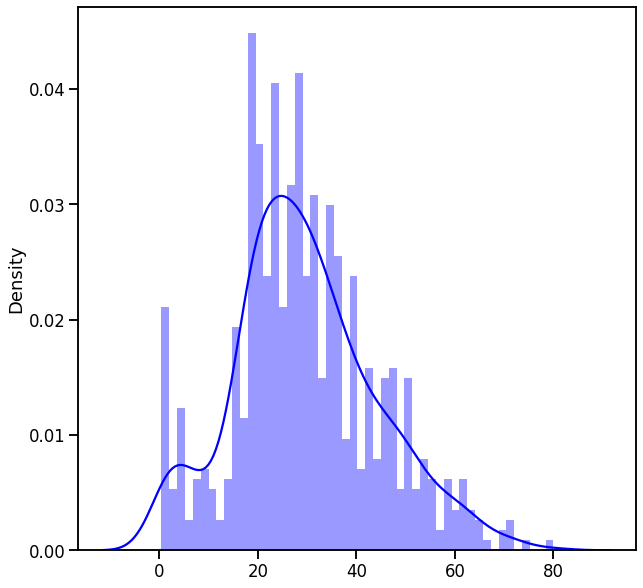

In [ ]:
plt.figure( figsize = [10, 10] )
sns.set_context("talk")
sns.distplot(
    df_train["Age"].dropna().values,
    bins = 50,
    hist = True,
    kde = True,
    color = "blue"
)

Let us now add mean and the quantiles of the values present in the above plot.

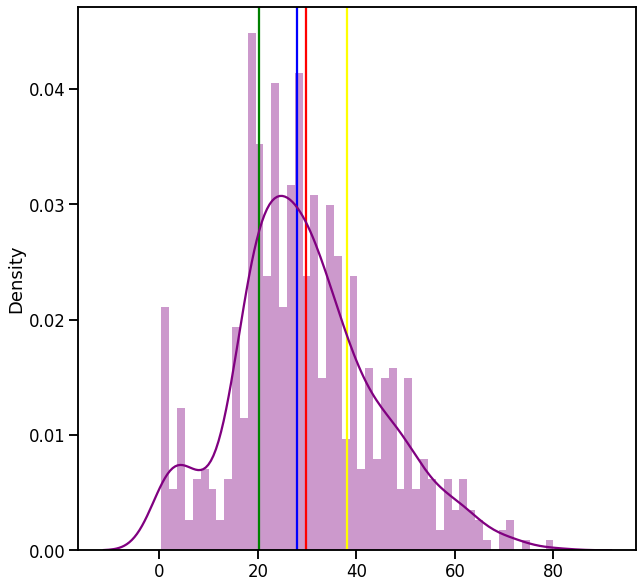

In [ ]:
# Set figure size
plt.figure( figsize = [10, 10] )

# Set Mean
plt.axvline(
    x = np.mean(
            df_train["Age"].dropna().values
        ),
    color = "red"
)

# Set Q1
plt.axvline(
    x = np.quantile(
            a = df_train["Age"].dropna().values,
            q = 0.25, 
            interpolation = 'linear'
        ), 
    color = "green"
    )

# Set Q2 or Median
plt.axvline(
    x = np.median(
            df_train["Age"].dropna().values
        ), 
    color = "blue"
)

# Set Q3
plt.axvline(
    x = np.quantile(
            a = df_train["Age"].dropna().values,
            q = 0.75,
            interpolation = 'linear'
        ),
    color = "yellow"
)

# Plot
sns.set_context("talk")
sns.distplot(
    df_train["Age"].dropna().values,
    bins = 50,
    hist = True,
    kde = True,
    color = "purple"
)

Clearly, the maximum number of points might be somewhere near 19, as the 1st quantile is approximately 20.

Now, let us plot the curves seperately for male and female.

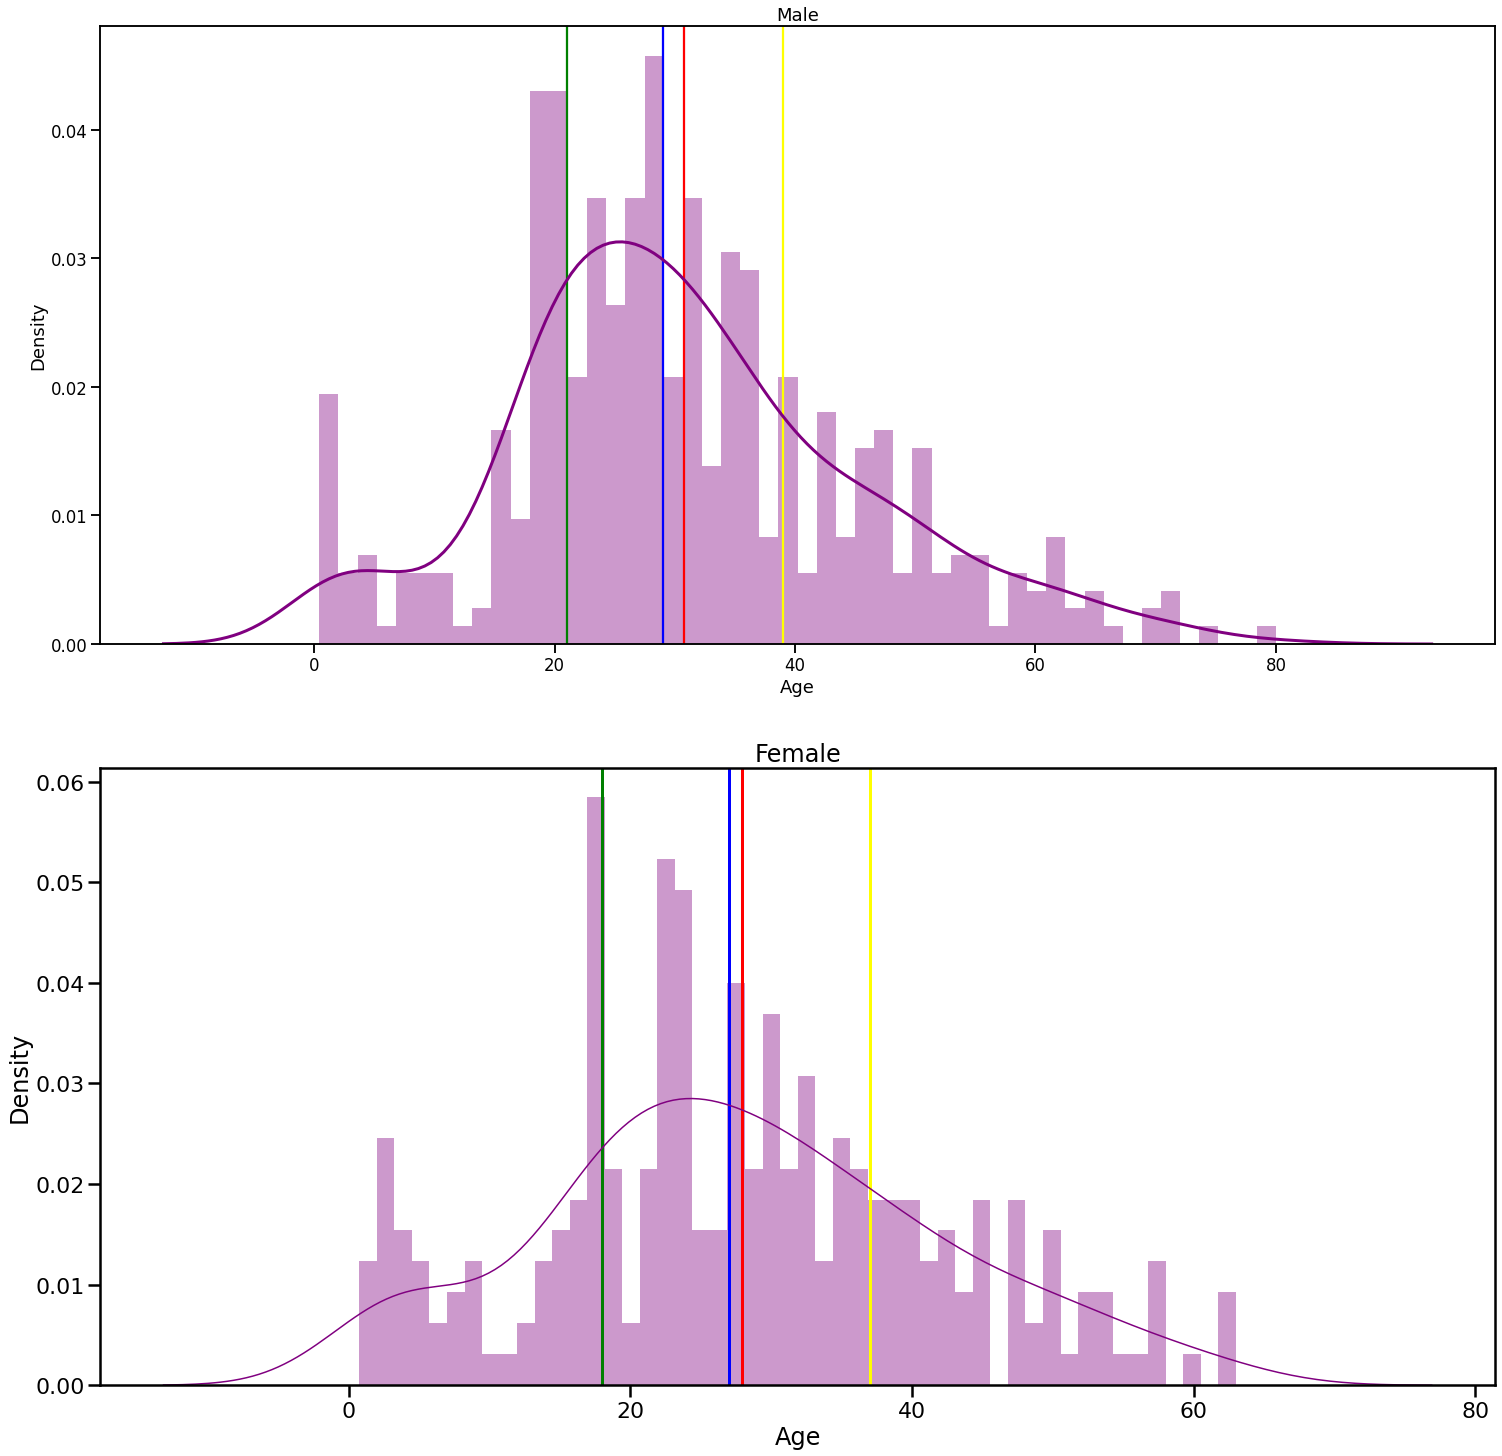

In [ ]:
ageListMale_wo_Nan = df_train["Age"][-df_train["Age"].isnull()][df_train["Sex"]=="male"]
ageListFemale_wo_Nan = df_train["Age"][-df_train["Age"].isnull()][df_train["Sex"]=="female"]

# Set figure size
plt.figure(figsize = [25, 25] )

# Plot with Male age
# Position
plt.subplot(2, 1, 1)
# Mean line
plt.axvline(
    x = np.mean(ageListMale_wo_Nan),
    color = "red"
)
# Q1 line
plt.axvline(
    x = np.quantile(
            a = ageListMale_wo_Nan,
            q = 0.25,
            interpolation = 'linear'
        ),
    color = "green"
)
# Q2 or Median line
plt.axvline(
    x = np.median(ageListMale_wo_Nan), 
    color = "blue"
)
# Q3 line
plt.axvline(
    x = np.quantile(
            a = ageListMale_wo_Nan,
            q = 0.75,
            interpolation = 'linear'
        ), 
    color = "yellow"
)
# Title
plt.title( "Male" )
# Plot
sns.set_context("poster")
sns.distplot(
    ageListMale_wo_Nan,
    bins = 50,
    hist = True,
    kde = True,
    color = "purple"
)

# Plot with Male age
# Position
plt.subplot(2, 1, 2)
# Mean line
plt.axvline(
    x = np.mean(ageListFemale_wo_Nan), 
    color = "red"
)
# Q1 line
plt.axvline(
    x = np.quantile(
            a = ageListFemale_wo_Nan,
            q = 0.25,
            interpolation = 'linear'
        ), 
    color = "green"
)
# Q2 or Median line
plt.axvline(
    x = np.median(ageListFemale_wo_Nan),
    color = "blue"
)
# Q3 line
plt.axvline(
    x = np.quantile(
            a = ageListFemale_wo_Nan,
            q = 0.75,
            interpolation = 'linear'
        ), 
    color = "yellow"
)
# Title
plt.title( "Female" )
# Plot
sns.set_context("notebook")
sns.distplot(
    ageListFemale_wo_Nan,
    bins = 50,
    hist = True,
    kde = True,
    color = "purple"
)

It is not easy to determine the perfect value to impute in the missing places in the "Age" column.

But in case of "male" passengers, most of them are around 28.25 years and in case of "female" passengers, most of them are around 17.5 years.

But, if age is imputed with 28.25 in case of male passengers and with 17.5 in case of the female passengers, then a problem may occur.

It might happen that, a male with title Master, who might be a teenager, will get have age of 28.25 years, which is not acceptable at all.

So, we will find the mean age and median age of the passengers with different titles and then we will impute the mean of the these calculated values to the persons with the respective titles.

In [ ]:
df_train["Title"].nunique()

17

The above output shows that there are 17 unique titles present in the training data set.

We can now print the statistical summary of ages for different titles, excluding the missing values.

In [ ]:
for title in df_train["Title"].unique() :
    print("\n==========", title, "==========")
    print(df_train["Age"][ (-df_train["Age"].isna()) & (df_train["Title"] == title) ].describe())


========== Mr ==========
count    398.000000
mean      32.368090
std       12.708793
min       11.000000
25%       23.000000
50%       30.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

========== Mrs ==========
count    108.000000
mean      35.898148
std       11.433628
min       14.000000
25%       27.750000
50%       35.000000
75%       44.000000
max       63.000000
Name: Age, dtype: float64

========== Miss ==========
count    146.000000
mean      21.773973
std       12.990292
min        0.750000
25%       14.125000
50%       21.000000
75%       30.000000
max       63.000000
Name: Age, dtype: float64

========== Master ==========
count    36.000000
mean      4.574167
std       3.619872
min       0.420000
25%       1.000000
50%       3.500000
75%       8.000000
max      12.000000
Name: Age, dtype: float64

========== Don ==========
count     1.0
mean     40.0
std       NaN
min      40.0
25%      40.0
50%      40.0
75%      40.0
max      40.0
Name: Age, dty

Now, we will impute the missing values in the Age column as planned above.

In [ ]:
for title in df_train["Title"] :
    medianAge = df_train["Age"][
                   ( -df_train["Age"].isnull() ) &
                   ( df_train["Title"] == title )
                ].median()
    meanAge = df_train["Age"][
                   ( -df_train["Age"].isnull() ) &
                   ( df_train["Title"] == title )
                ].mean()
    j = 0
    for age in df_train["Age"] :
        if (str(age) == "nan") & (str(df_train["Title"][j]) == title):
            df_train["Age"][j] = (medianAge + meanAge)/2
        else :
            pass
        j = j + 1

# Check
if df_train["Age"].isnull().sum() == 0 :
    print("Missing Values Imputed!")
else :
    print("Missing Values remaining still in the column!")

Missing Values Imputed!


Now, let us plot the ages with respect to the titles with more than 10 passengers.

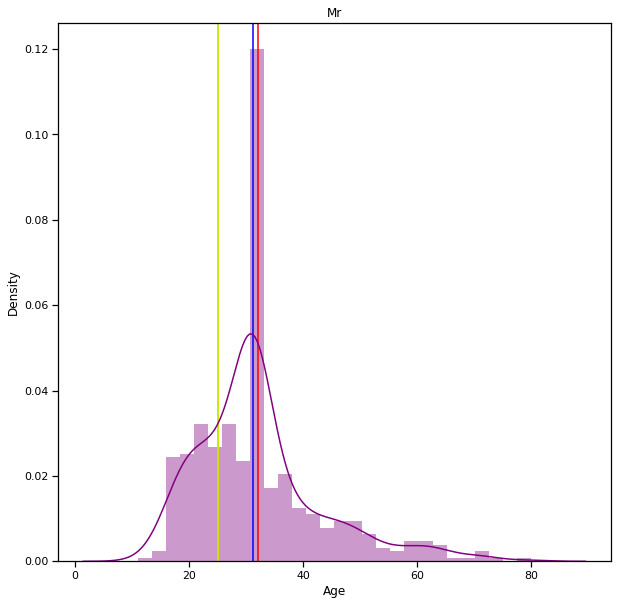

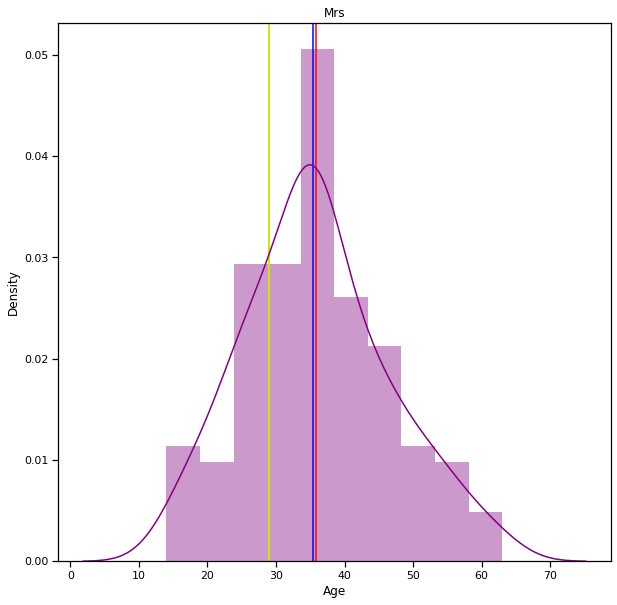

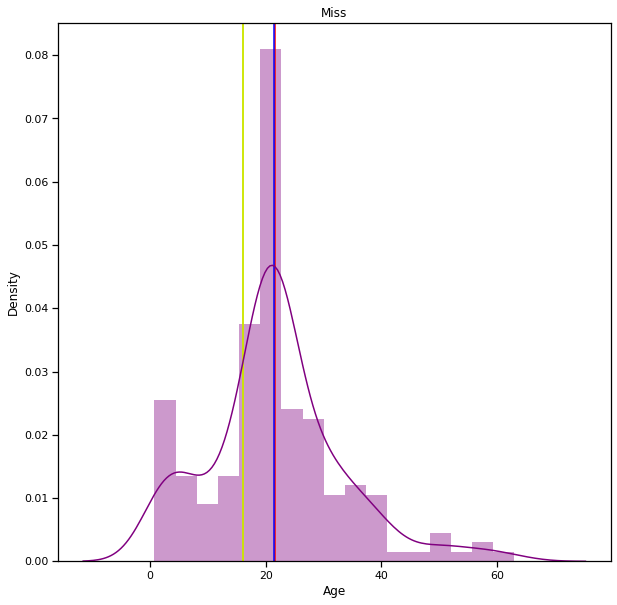

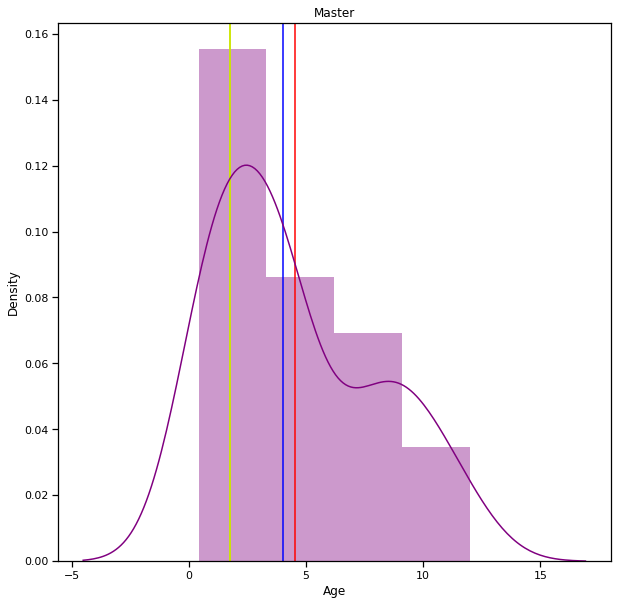

In [ ]:
for title in df_train["Title"].unique() :
    if df_train["Title"][df_train["Title"] == title].count() > 10 :
        i = 1
        plt.figure( figsize = [200,200] )
        plt.subplot(df_train["Title"].nunique(), df_train["Title"].nunique(), i)
        # Mean line
        plt.axvline(
            x = df_train["Age"][ (-df_train["Age"].isna()) & (df_train["Title"] == title) ].mean(), 
            color = "red"
        )
        # Q1 line
        plt.axvline(
            x = df_train["Age"][ (-df_train["Age"].isna()) & (df_train["Title"] == title) ].quantile(0.25, "linear"),
            color = "green"
        )
        # Q2 or Median line
        plt.axvline(
            x = df_train["Age"][ (-df_train["Age"].isna()) & (df_train["Title"] == title) ].median(),
            color = "blue"
        )
        # Q3 line
        plt.axvline(
            x = df_train["Age"][ (-df_train["Age"].isna()) & (df_train["Title"] == title) ].quantile(0.25, "linear"), 
            color = "yellow"
        )
        # Title
        plt.title( title )
        # Plot
        sns.distplot(
            df_train["Age"][ (-df_train["Age"].isna()) & (df_train["Title"] == title) ],
            hist = True,
            kde = True,
            color = "purple"
        )
        i += 1

So, the missing values have been imputed and also the mean and median of the ages with respect to different titles with more than 10 passengers, have become almost equal.

**Testing Set**

Here also, we will impute the missing values with the same process done in the training set.

In [ ]:
for title in df_test["Title"] :
    medianAge = df_test["Age"][
                   ( -df_test["Age"].isnull() ) &
                   ( df_test["Title"] == title )
                ].median()
    meanAge = df_test["Age"][
                   ( -df_test["Age"].isnull() ) &
                   ( df_test["Title"] == title )
                ].mean()
    j = 0
    for age in df_test["Age"] :
        if (str(age) == "nan") & (str(df_test["Title"][j]) == title):
            df_test["Age"][j] = (medianAge + meanAge)/2
        else :
            pass
        j = j + 1

# Check
if df_test["Age"].isnull().sum() == 0 :
    print("Missing Values Imputed!")
else :
    print("Missing Values remaining still in the column!")

Missing Values remaining still in the column!


Missing Values remaining still in the column!
But, the above output shows that, Missing Value(s) is/are still present in the Age column of the training set.

Now, we will find out the passengers whose missing ages were not imputed.

In [ ]:
df_test[df_test["Age"].isnull()]

,PassengerId,Title,FirstName,LastName,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
88,980,Ms,Bridget,O'Donoghue,3,female,NaN,0,0,364856,7.75,Q


So, our plan failed to impute the missing value in the age column incase of this passenger only, as there are no more passengers in the testing set with the same title.

Let us now find out, the number of passengers in the training set with the title "Ms".

In [ ]:
df_train["Title"][df_train["Title"] == "Ms"].count()

1

So, training set also has only one passenger with the title Ms.

Let us now find out her form the training set.

In [ ]:
df_train[df_train["Title"] == "Ms"]

,PassengerId,Title,FirstName,LastName,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
443,444,Ms,Encarnacion,Reynaldo,1,2,female,28.0,0,0,230434,13.0,S


So, Ms. Encarnacion Reynaldo (Passenger Id - 444) was 28 years old.

We will impute the age of Ms. Bridget O'Donoghue (Passenger Id - 980) as 28.

In [ ]:
df_test["Age"][df_test["Title"] == "Ms"] = 28

In [ ]:
if df_test["Age"].isnull().sum() == 0 :
    print("Missing Values Imputed!")
else :
    print("Missing Values remaining still in the column!")

Missing Values Imputed!


Missing Values Imputed!
Hence, all the missing values of the age column in the testing set have been imputed.

Missing Value Treatment on Fare in Testing Set
We have seen earlier that, the Fare column of the testing set has only one missing value.

Let us first find the details of the passenger with the missing value in the Fare column.

In [ ]:
df_test[df_test["Fare"].isnull()]

,PassengerId,Title,FirstName,LastName,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,Mr,Thomas,Storey,3,male,60.5,0,0,3701,NaN,S


Mr. Thomas Storey (Passenger ID : 1044) was trevelling alone in the 3rd Class, who boarded the Titanic from Southampton. He was 60.5 years old.

Now, let us find out if there are other passengers in the testing set with Title "Mr", travelled in 3rd Class, boarded the Titanic from Southampton and whose age is within 55 to 65 years.

In [ ]:
df_test[
    df_test["Pclass"] == 3
][
    df_test["Title"] == "Mr"
][
    df_test["Embarked"] == "S"
][
    df_test["Age"] >= 55
][
    df_test["Age"] <= 65
].sort_values(
    by = ["Age"]
)

,PassengerId,Title,FirstName,LastName,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,Mr,Thomas,Storey,3,male,60.5,0,0,3701,NaN,S


Testing Set has Mr. Thomas Storey only.

Let us search in Training set for passengers with similar conditions mentioned before.

In [ ]:
df_train[
    df_train["Pclass"] == 3
][
    df_train["Title"] == "Mr"
][
    df_train["Embarked"] == "S"
][
    df_train["Age"] >= 55
][
    df_train["Age"] <= 65
].sort_values(
    by = ["Age"]
)

,PassengerId,Title,FirstName,LastName,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,153,Mr,Alfonzo,Meo,0,3,male,55.5,0,0,A.5. 11206,8.0500,S
94,95,Mr,Daniel,Coxon,0,3,male,59.0,0,0,364500,7.2500,S
326,327,Mr,Johan Hansen,Nysveen,0,3,male,61.0,0,0,345364,6.2375,S


According to the age of the passengers obtained in the above output, the age of Mr. Thomas Storey will lie within the ages of Mr Daniel Coxon and Mr Johan Hansen Nysveen.

So, we will impute the Fare of Mr. Thomas Storey with the average of the fares of Mr Daniel Coxon and Mr Johan Hansen Nysveen.

In [ ]:
df_test["Fare"][
    df_test["Fare"].isnull()
] = (7.2500 + 6.2375)/2

So, the missing value in the Fare column of the Testing set has been imputed successfully.

**Feature Engineering on Fare**

Let us look at the fares of first 10 passengers in the training dataset.

In [ ]:
df_train.head(10)

,PassengerId,Title,FirstName,LastName,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,Mr,Owen Harris,Braund,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,2,Mrs,John Bradley (Florence Briggs Thayer),Cumings,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,3,Miss,Laina,Heikkinen,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,Mrs,Jacques Heath (Lily May Peel),Futrelle,1,1,female,35.000000,1,0,113803,53.1000,S
4,5,Mr,William Henry,Allen,0,3,male,35.000000,0,0,373450,8.0500,S
5,6,Mr,James,Moran,0,3,male,31.184045,0,0,330877,8.4583,Q
6,7,Mr,Timothy J,McCarthy,0,1,male,54.000000,0,0,17463,51.8625,S
7,8,Master,Gosta Leonard,Palsson,0,3,male,2.000000,3,1,349909,21.0750,S
8,9,Mrs,Oscar W (Elisabeth Vilhelmina Berg),Johnson,1,3,female,27.000000,0,2,347742,11.1333,S
9,10,Mrs,Nicholas (Adele Achem),Nasser,1,2,female,14.000000,1,0,237736,30.0708,C


Among the passegers in the above output, Master Gosta Leonard Palsson (PassengerId : 8) is travelling with other 4 family members.

Now, let us find out the fares of his family members from both the training and testing set.

In [ ]:
df_train[df_train["LastName"] == "Palsson"]

,PassengerId,Title,FirstName,LastName,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,Master,Gosta Leonard,Palsson,0,3,male,2.0,3,1,349909,21.075,S
24,25,Miss,Torborg Danira,Palsson,0,3,female,8.0,3,1,349909,21.075,S
374,375,Miss,Stina Viola,Palsson,0,3,female,3.0,3,1,349909,21.075,S
567,568,Mrs,Nils (Alma Cornelia Berglund),Palsson,0,3,female,29.0,0,4,349909,21.075,S


In [ ]:
df_test[df_test["LastName"] == "Palsson"]

,PassengerId,Title,FirstName,LastName,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
389,1281,Master,Paul Folke,Palsson,3,male,6.0,3,1,349909,21.075,S


We have found all the 5 family members including Master Gosta Leonard Palsson. It seems that, the fare given against each passenger is actually the total fare that they paid for travelling with their family members. So, at first we have to find the fares seperately for each passenger in the training set and testing set seperately.

Now, let us find the statistical summary of the Fares for each of the three passenger classes, seperately.

In [ ]:
for pclass in df_train["Pclass"].unique() :
    print("\n========== Passenger Class :",pclass,"==========")
    print((df_train["Fare"][df_train["Pclass"] == pclass]).describe())


========== Passenger Class : 3 ==========
count    491.000000
mean      13.675550
std       11.778142
min        0.000000
25%        7.750000
50%        8.050000
75%       15.500000
max       69.550000
Name: Fare, dtype: float64

========== Passenger Class : 1 ==========
count    216.000000
mean      84.154687
std       78.380373
min        0.000000
25%       30.923950
50%       60.287500
75%       93.500000
max      512.329200
Name: Fare, dtype: float64

========== Passenger Class : 2 ==========
count    184.000000
mean      20.662183
std       13.417399
min        0.000000
25%       13.000000
50%       14.250000
75%       26.000000
max       73.500000
Name: Fare, dtype: float64


The minimum fares in each of the three classes is 0.

Now, let us find the passengers in the training set and testing set with 0 fare.

In [ ]:
df_train[ df_train["Fare"] == 0 ]

,PassengerId,Title,FirstName,LastName,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
179,180,Mr,Lionel,Leonard,0,3,male,36.000000,0,0,LINE,0.0,S
263,264,Mr,William,Harrison,0,1,male,40.000000,0,0,112059,0.0,S
271,272,Mr,William Henry,Tornquist,1,3,male,25.000000,0,0,LINE,0.0,S
277,278,Mr,"Francis ""Frank""",Parkes,0,2,male,31.184045,0,0,239853,0.0,S
302,303,Mr,William Cahoone Jr,Johnson,0,3,male,19.000000,0,0,LINE,0.0,S
413,414,Mr,Alfred Fleming,Cunningham,0,2,male,31.184045,0,0,239853,0.0,S
466,467,Mr,William,Campbell,0,2,male,31.184045,0,0,239853,0.0,S
481,482,Mr,"Anthony Wood ""Archie""",Frost,0,2,male,31.184045,0,0,239854,0.0,S
597,598,Mr,Alfred,Johnson,0,3,male,49.000000,0,0,LINE,0.0,S
633,634,Mr,William Henry Marsh,Parr,0,1,male,31.184045,0,0,112052,0.0,S


In [ ]:
df_test[ df_test["Fare"] == 0 ]

,PassengerId,Title,FirstName,LastName,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
266,1158,Mr,Roderick Robert Crispin,Chisholm,1,male,30.25,0,0,112051,0.0,S
372,1264,Mr,Joseph Bruce,Ismay,1,male,49.00,0,0,112058,0.0,S


So, 14 Passengers from training set and 2 passengers from testing set with title Mr and only one passenger with title Johnkheer from training set are travelling without any fare - which cannot be accepted at all. May be, the Fares in case of the passengers in the above output are not known or entered incorrectly.

In [ ]:
for pclass in df_train["Pclass"].unique() :
    print("\n========== Passenger Class :",pclass,"==========")
    print(df_train["Fare"][
            df_train["Fare"] != 0
        ][
            df_train["Title"] == "Mr"
        ][
            df_train["Pclass"] == pclass
        ].describe())


========== Passenger Class : 3 ==========
count    315.000000
mean      11.443251
std       10.428898
min        4.012500
25%        7.750000
50%        7.895800
75%        8.662500
max       69.550000
Name: Fare, dtype: float64

========== Passenger Class : 1 ==========
count    103.000000
mean      70.676497
std       81.609802
min        5.000000
25%       29.700000
50%       49.504200
75%       78.068750
max      512.329200
Name: Fare, dtype: float64

========== Passenger Class : 2 ==========
count    85.000000
mean     20.611568
std      15.329982
min      10.500000
25%      13.000000
50%      13.000000
75%      26.000000
max      73.500000
Name: Fare, dtype: float64


In [ ]:
for pclass in df_test["Pclass"].unique() :
    print("\n========== Passenger Class :",pclass,"==========")
    print(df_test["Fare"][
            df_test["Fare"] != 0
        ][
            df_test["Title"] == "Mr"
        ][
            df_test["Pclass"] == pclass
        ].describe())


========== Passenger Class : 3 ==========
count    129.000000
mean      10.585772
std        8.777437
min        6.437500
25%        7.650000
50%        7.854200
75%        8.050000
max       69.550000
Name: Fare, dtype: float64

========== Passenger Class : 2 ==========
count    59.000000
mean     19.951410
std      14.988379
min       9.687500
25%      12.350000
50%      13.000000
75%      26.000000
max      73.500000
Name: Fare, dtype: float64

========== Passenger Class : 1 ==========
count     50.000000
mean      71.473502
std       58.983561
min       25.741700
25%       27.720800
50%       51.179150
75%       81.500025
max      262.375000
Name: Fare, dtype: float64


So, the statistical summary of the fares of the passengers with non-zero fares and title "Mr" for three different passenger classes in the training set are approximately equal to those passengers in the testing set.

Incase of the passengers with title Mr, we will impute the median fare of those passengers with title Mr, whose fares are non-zero, from each of the three passenger classes seperately, in the training set and testing set seperately.

**Training Set**

Calculate fares of the passengers seperately.

In [ ]:
i = 0
for (s,p) in zip(df_train["SibSp"], df_train["Parch"]) :
    df_train["Fare"][i] = round(df_train["Fare"][i]/(s+p+1), 2)
    i += 1

In [ ]:
df_train.head(10)

,PassengerId,Title,FirstName,LastName,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,Mr,Owen Harris,Braund,0,3,male,22.000000,1,0,A/5 21171,3.62,S
1,2,Mrs,John Bradley (Florence Briggs Thayer),Cumings,1,1,female,38.000000,1,0,PC 17599,35.64,C
2,3,Miss,Laina,Heikkinen,1,3,female,26.000000,0,0,STON/O2. 3101282,7.92,S
3,4,Mrs,Jacques Heath (Lily May Peel),Futrelle,1,1,female,35.000000,1,0,113803,26.55,S
4,5,Mr,William Henry,Allen,0,3,male,35.000000,0,0,373450,8.05,S
5,6,Mr,James,Moran,0,3,male,31.184045,0,0,330877,8.46,Q
6,7,Mr,Timothy J,McCarthy,0,1,male,54.000000,0,0,17463,51.86,S
7,8,Master,Gosta Leonard,Palsson,0,3,male,2.000000,3,1,349909,4.22,S
8,9,Mrs,Oscar W (Elisabeth Vilhelmina Berg),Johnson,1,3,female,27.000000,0,2,347742,3.71,S
9,10,Mrs,Nicholas (Adele Achem),Nasser,1,2,female,14.000000,1,0,237736,15.04,C


Replace the 0 fares of the passengers with title "Mr".

In [ ]:
for pclass in df_train["Pclass"].unique() :
    median_fare =  round((df_train["Fare"][
                        df_train["Fare"] != 0.0
                    ][
                        df_train["Title"] == "Mr"
                    ][
                        df_train["Pclass"] == pclass
                    ]).median(), 2)
    condition = ((df_train["Fare"] == 0.0) & 
                 (df_train["Title"] == "Mr") &
                 (df_train["Pclass"] == pclass))
    df_train["Fare"].mask(condition, median_fare, inplace=True)

The Fares have been replaced for the passengers with the title Mr.

But, for the Jonkheer titled passenger, we will insert the max fare of the 1st class.

In [ ]:
fare = max(df_train["Fare"][df_train["Pclass"] == 1])
df_train["Fare"].mask(
    df_train["Title"] == "Jonkheer",
    fare, 
    inplace=True
)

In [ ]:
df_train["PassengerId"][df_train["Fare"] == 0.0].count()

0

So, we have no more passengers left with 0 fare in training set.

**Testing Set**

Calculate fares of the passengers seperately.

In [ ]:
i = 0
for (s,p) in zip(df_train["SibSp"], df_train["Parch"]) :
    df_train["Fare"][i] = round(df_train["Fare"][i]/(s+p+1), 2)
    i += 1

In [ ]:
df_train.head(10)

,PassengerId,Title,FirstName,LastName,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,Mr,Owen Harris,Braund,0,3,male,22.000000,1,0,A/5 21171,1.81,S
1,2,Mrs,John Bradley (Florence Briggs Thayer),Cumings,1,1,female,38.000000,1,0,PC 17599,17.82,C
2,3,Miss,Laina,Heikkinen,1,3,female,26.000000,0,0,STON/O2. 3101282,7.92,S
3,4,Mrs,Jacques Heath (Lily May Peel),Futrelle,1,1,female,35.000000,1,0,113803,13.28,S
4,5,Mr,William Henry,Allen,0,3,male,35.000000,0,0,373450,8.05,S
5,6,Mr,James,Moran,0,3,male,31.184045,0,0,330877,8.46,Q
6,7,Mr,Timothy J,McCarthy,0,1,male,54.000000,0,0,17463,51.86,S
7,8,Master,Gosta Leonard,Palsson,0,3,male,2.000000,3,1,349909,0.84,S
8,9,Mrs,Oscar W (Elisabeth Vilhelmina Berg),Johnson,1,3,female,27.000000,0,2,347742,1.24,S
9,10,Mrs,Nicholas (Adele Achem),Nasser,1,2,female,14.000000,1,0,237736,7.52,C


Replace the 0 fares of the passengers with title "Mr".

In [ ]:
for pclass in df_test["Pclass"].unique() :
    median_fare =  round((df_test["Fare"][
                        df_test["Fare"] != 0.0
                    ][
                        df_test["Title"] == "Mr"
                    ][
                        df_test["Pclass"] == pclass
                    ]).median(), 2)
    condition = ((df_test["Fare"] == 0.0) & 
                 (df_test["Title"] == "Mr") &
                 (df_test["Pclass"] == pclass))
    df_test["Fare"].mask(condition, median_fare, inplace=True)

In [ ]:
df_test["PassengerId"][df_test["Fare"]==0.0].count()

0

So, we have no more passengers left with 0 fare in testing set.

**Save the Pre-processed Data as a csv**

In [ ]:
df_train.to_csv(
    "titanic_preprocessed.csv",
    header = True,
    index = False
)
print("Preprocessed Data Training is saved in new csv file!")

Preprocessed Data Training is saved in new csv file!


In [ ]:
df_test.to_csv(
    "titanic_preprocessed2.csv",
    header = True,
    index = False
)
print("Preprocessed Testing Data is saved in new csv file!")

Preprocessed Testing Data is saved in new csv file!
